In [1]:
import wave
import base64
from PIL import Image
import io
from cryptography.fernet import Fernet

In [2]:
# Generating key using 'cryptography' library for symmetric encryption of data
key = Fernet.generate_key()
print(key)

b'b8TMbveShn0ZKErLMIsMWfxGpzb87I1zxAr6wOVX7J4='


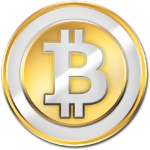

In [3]:
# Importing image in bites format to be encrypted and subsequently embedded in audio file using steganography
with open("bitcoin.png", "rb") as image:
    b64string = base64.b64encode(image.read())
f = io.BytesIO(base64.b64decode(b64string))
pilimage = Image.open(f)
pilimage

In [4]:
# Encrypting image using above generated key
encryptor = Fernet(key)
encrypted_str = encryptor.encrypt(b64string)


In [5]:
# Creating function to encode data in string format
def encode(string):
    print("\nEncoding Starts..")
    # Importing audio file
    audio = wave.open("sample.wav",mode="rb")
    # Reading frames of audio file into byte array for encoding
    frame_bytes = bytearray(list(audio.readframes(audio.getnframes())))
    # Appending dummy data to fill out remaining bytes of array
    string = string + int((len(frame_bytes)-(len(string)*8*8))/8) *'#'
    # Converting text to bit array
    bits = list(map(int, ''.join([bin(ord(i)).lstrip('0b').rjust(8,'0') for i in string])))
    
    # Replace LSB of each byte of the audio data by one bit from the text bit array
    for i, bit in enumerate(bits):
        frame_bytes[i] = (frame_bytes[i] & 254) | bit
    # Get the modified bytes
    frame_modified = bytes(frame_bytes)
    
    # Writing bytes to a new wave audio file
    newAudio =  wave.open('EncrypedStego.wav', 'wb')
    newAudio.setparams(audio.getparams())
    newAudio.writeframes(frame_modified)

    newAudio.close()
    audio.close()
    print("succesfully encoded inside audio file")

In [6]:
# Converting the enctryped bytes string to UTF-8 format & encoding using encode function
encode(str(encrypted_str)) 


Encoding Starts..
succesfully encoded inside audio file
